# important libraries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
hr=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
hr.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
hr.shape

(1470, 35)

Dropping EmployeeCount,StandardHours and Over18 columns as these columns does not add any value to predicting the model.

In [4]:
hr1=hr.drop(['EmployeeCount','StandardHours','Over18'],axis=1,inplace=True)

In [5]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
hr.shape

(1470, 32)

After dropping the irrelevent columns with respect to prediction the shape of the dataset is : 1470 rows and 32 columns

In [7]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

info attribute tells that there is 24 integer and 8 object value is present.

In [8]:
hr.isnull().sum().sum()

0

<AxesSubplot:>

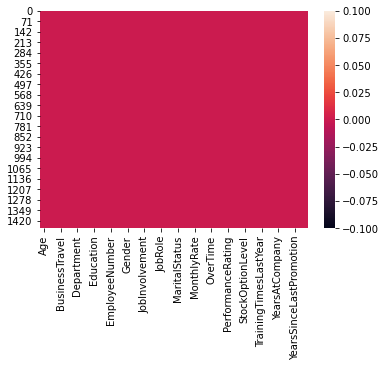

In [9]:
sns.heatmap(hr.isnull())

There is no null/missing value present in the dataset.

In [10]:
hr['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Value count on Attrition.

# Statistical Data Analysis:

In [11]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Count represent 1470 rows that is same in all the columns that represents that there is no missing values.

Minimum age employee is of 18 years old.

Maximum age employee is of 60 years old.

minimum rating is 3 and maximum is 4 this may be the major cause of attrition.

Stability of senior employees is higher than the juniors.

Min employee of age 18 is 1 whereas 60 year employee is 2068.

# Exploratory Data Analysis:

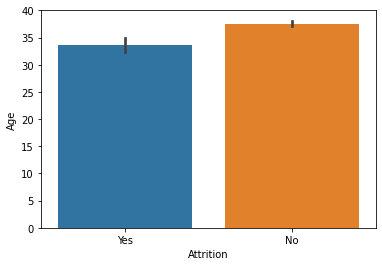

In [12]:
sns.barplot(x='Attrition',y='Age',data=hr)
plt.title
plt.show()

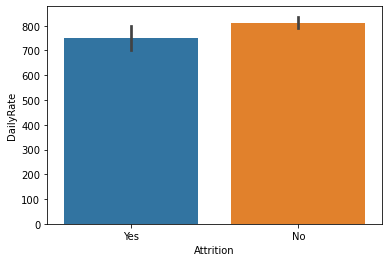

In [13]:
sns.barplot(x='Attrition',y='DailyRate',data=hr)
plt.show()

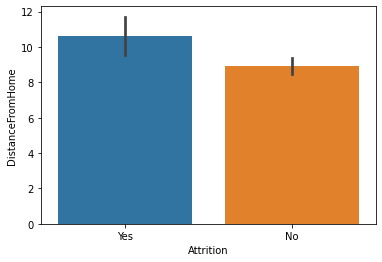

In [14]:
sns.barplot(x='Attrition',y='DistanceFromHome',data=hr)
plt.show()

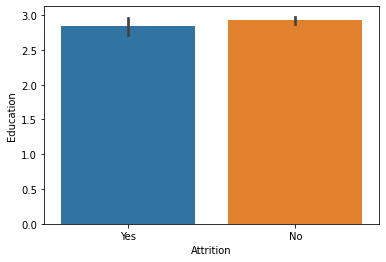

In [15]:
sns.barplot(x='Attrition',y='Education',data=hr)
plt.show()

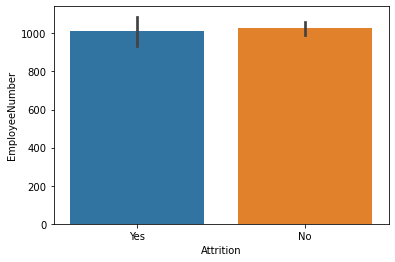

In [16]:
sns.barplot(x='Attrition',y='EmployeeNumber',data=hr)
plt.show()

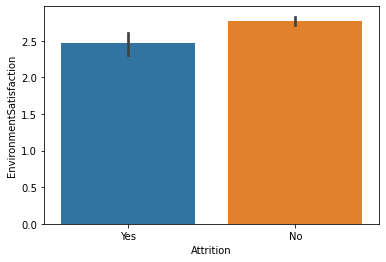

In [17]:
sns.barplot(x='Attrition',y='EnvironmentSatisfaction',data=hr)
plt.show()

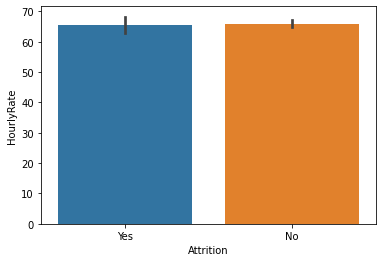

In [18]:
sns.barplot(x='Attrition',y='HourlyRate',data=hr)
plt.show()

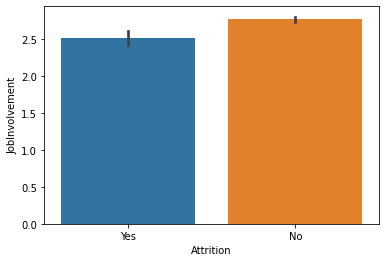

In [19]:
sns.barplot(x='Attrition',y='JobInvolvement',data=hr)
plt.show()

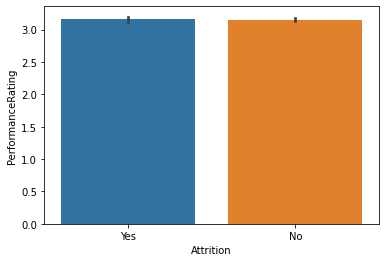

In [20]:
sns.barplot(x='Attrition',y='PerformanceRating',data=hr)
plt.show()

# Correalation Matrix:

In [21]:
hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


Plotting Correalation Matrix:

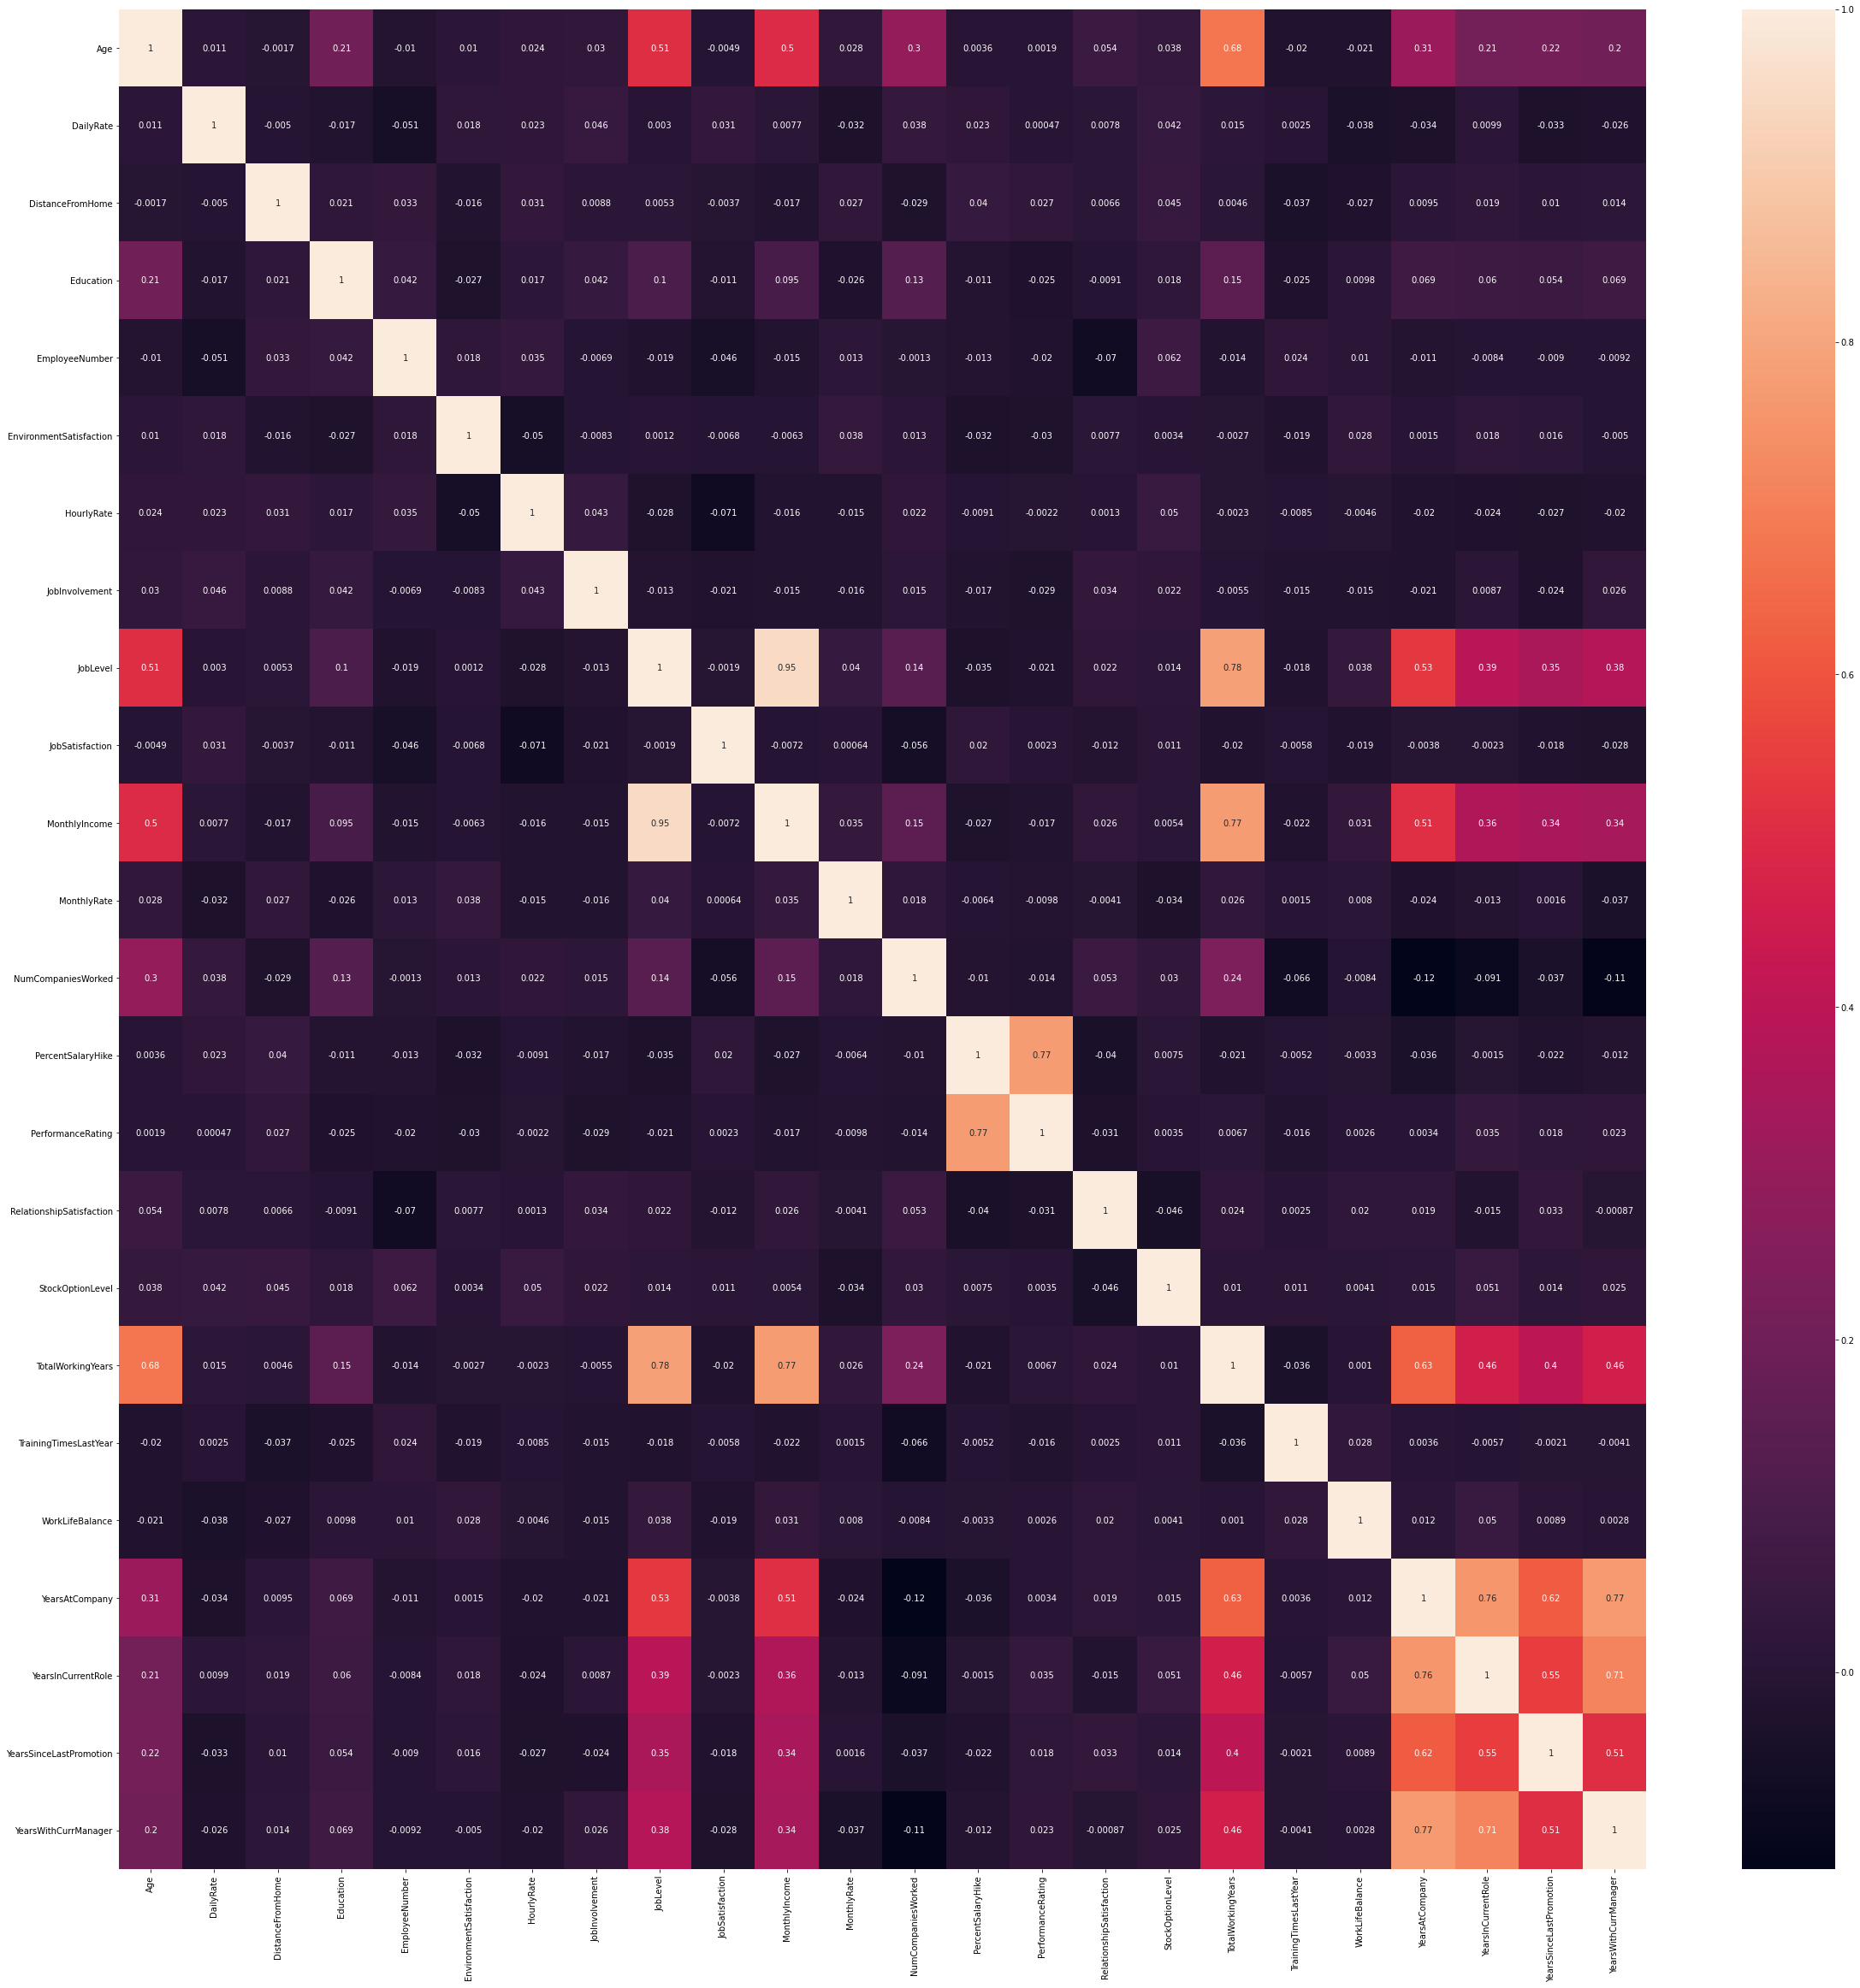

In [22]:
plt.figure(figsize=(40,40))
sns.heatmap(hr.corr(),annot=True,color='Purple',linecolor='b')
plt.show()
           

Kernel Density Estimation using pirplot

In [23]:
#sns.pairplot(hr,kind='kde')

# Data Distributaion:

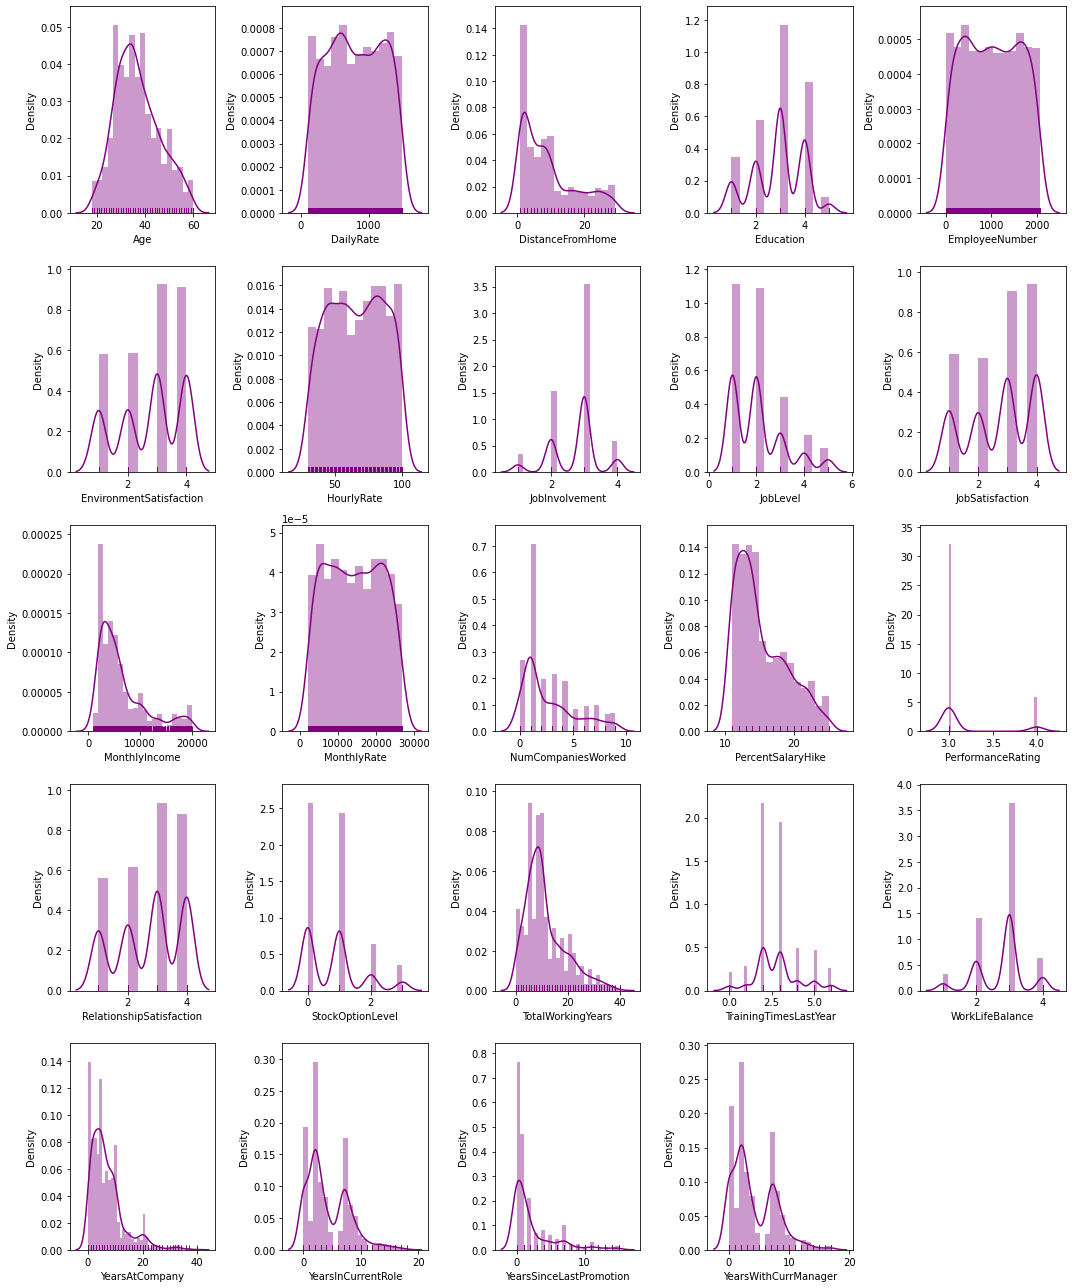

In [24]:
oex=hr.select_dtypes(exclude='object')
plt.figure(figsize=(15,18))
p=1
for i in oex:
    if p<=25:
        plt.subplot(5,5,p)
        sns.distplot(hr[i],color='Purple',rug='True',)
        plt.xlabel(i)
        p=p+1
plt.tight_layout();

# Outliers Detection:

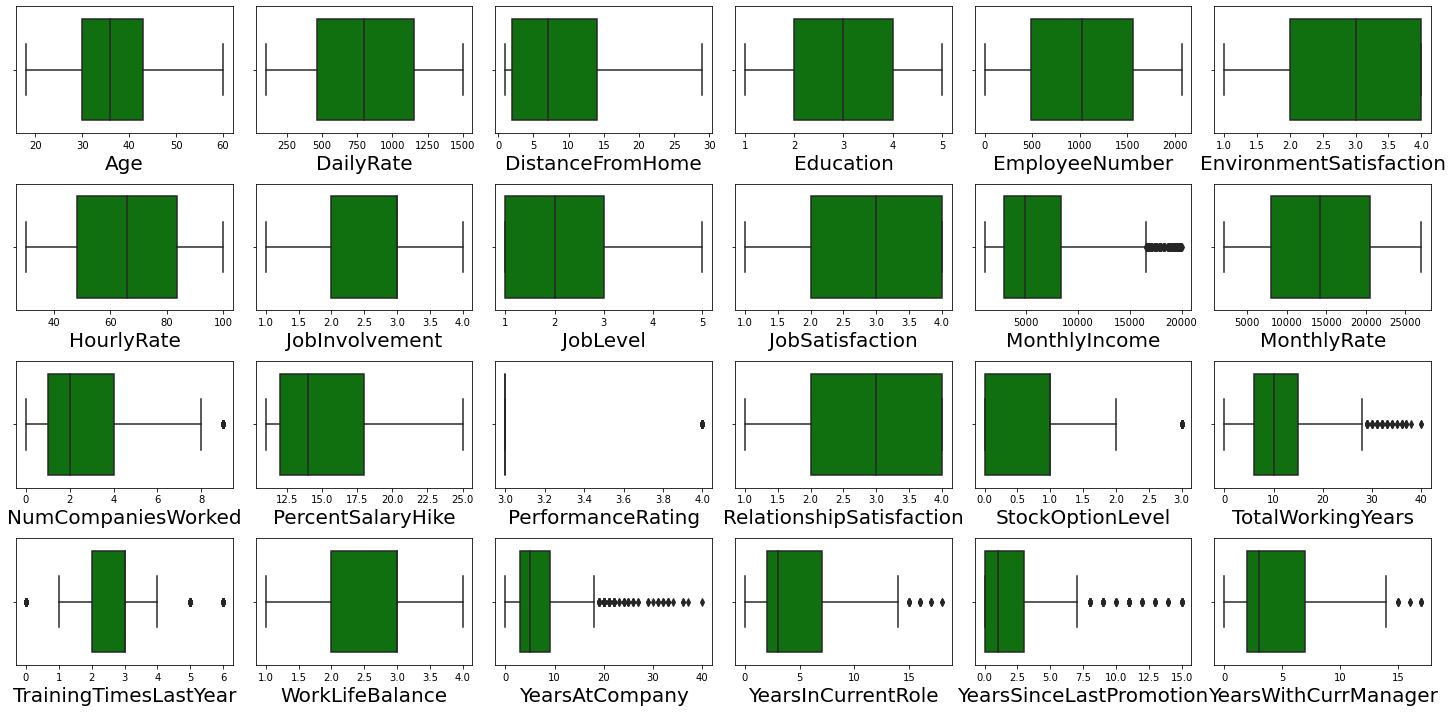

In [25]:
plt.figure(figsize=(20,10))
p=1
for i in oex:
    if p<=25:
        plt.subplot(4,6,p)
        sns.boxplot(hr[i],color='Green',orient='horizontal')
        plt.xlabel(i,fontsize=20)
        p=p+1
plt.tight_layout() 

Outlier removel using Zscore:

In [26]:
from scipy.stats import zscore
z =np.abs(zscore(oex))
print(z.shape)
hr =hr.loc[(z<3).all(axis=1)]
print(hr.shape)

(1470, 24)
(1387, 32)


# Skewness:

In [27]:
hr.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

# Removing Skewness using log1p method:

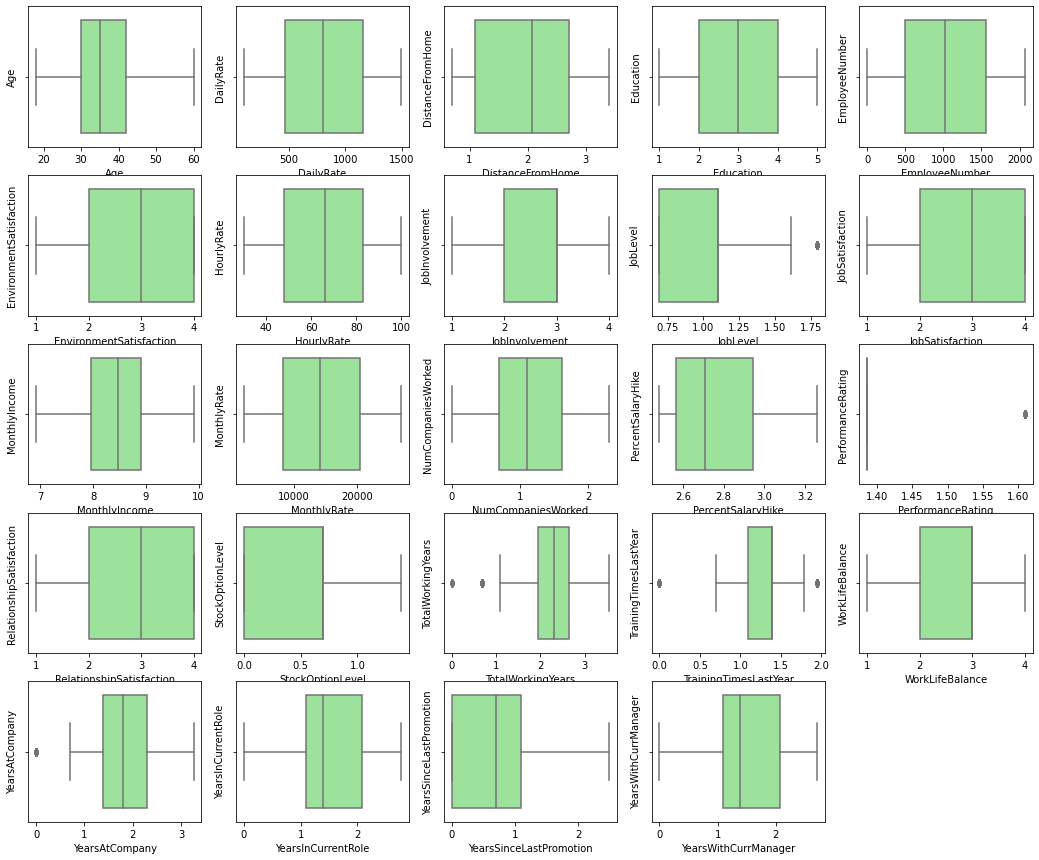

In [28]:
for i in oex:
    if hr[i].skew()>.55:
        hr[i]=np.log1p(hr[i])
        
plt.figure(figsize=(18,15))
p=1
for i in oex:
    if p<=35:
        plt.subplot(5,5,p)
        sns.boxplot(hr[i],color='LightGreen',)
        plt.ylabel(i)
        p=p+1
plt.show(); 

In [29]:
hr.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome           -0.031570
Education                  -0.289024
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.497167
JobSatisfaction            -0.345612
MonthlyIncome               0.318873
MonthlyRate                 0.030596
NumCompaniesWorked          0.101288
PercentSalaryHike           0.496106
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.275912
TotalWorkingYears          -0.728348
TrainingTimesLastYear      -1.044321
WorkLifeBalance            -0.557100
YearsAtCompany             -0.379527
YearsInCurrentRole         -0.390406
YearsSinceLastPromotion     0.695348
YearsWithCurrManager       -0.347018
dtype: float64

# Label Encoding for categorical columns:

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in hr:
    hr[i]=le.fit_transform(hr[i])

In [31]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,605,2,0,1,1,0,1,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,108,1,7,0,1,1,2,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,783,1,1,1,4,2,3,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,798,1,2,3,1,3,3,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,298,1,1,0,3,4,0,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,476,1,22,1,3,1382,2,...,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,312,1,5,0,3,1383,3,...,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,1384,1,...,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,561,2,1,2,3,1385,3,...,0,3,0,17,3,1,9,6,0,8


# Dropping Target Variable:

In [32]:
x=hr.drop(['Attrition'],axis=1)
y=hr[['Attrition']]

In [33]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,2,605,2,0,1,1,0,1,0,...,0,0,0,8,0,0,6,4,0,5
1,31,1,108,1,7,0,1,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,19,2,783,1,1,1,4,2,3,1,...,0,1,0,7,3,2,0,0,0,0
3,15,1,798,1,2,3,1,3,3,0,...,0,2,0,8,3,2,8,7,3,0
4,9,2,298,1,1,0,3,4,0,1,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,1,476,1,22,1,3,1382,2,1,...,0,2,1,17,3,2,5,2,0,3
1466,21,2,312,1,5,0,3,1383,3,1,...,0,0,1,9,5,2,7,7,1,7
1467,9,2,39,1,3,2,1,1384,1,1,...,1,1,1,6,0,2,6,2,0,3
1468,31,1,561,2,1,2,3,1385,3,1,...,0,3,0,17,3,1,9,6,0,8


In [34]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


# Scaling:

In [35]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_value=ss.fit_transform(x)
x=pd.DataFrame(scaled_value,columns=x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.536681,0.593126,0.704123,1.405373,-1.011249,-0.876177,-0.940815,-1.730802,-0.665328,-1.229911,...,-0.424765,-1.575817,-0.929427,-0.343728,-2.171420,-2.501172,-0.021502,0.040903,-0.710699,0.368270
1,1.442111,-0.905354,-1.307962,-0.496337,-0.145521,-1.853858,-0.940815,-1.728305,0.251978,0.813067,...,2.354241,1.199034,0.238250,-0.045106,0.151871,0.336558,0.836703,0.965895,-0.310480,0.982200
2,0.083966,0.593126,1.424749,-0.496337,-0.887573,-0.876177,1.305159,-1.725807,1.169285,0.813067,...,-0.424765,-0.650866,-0.929427,-0.493039,0.151871,0.336558,-1.308809,-1.192419,-0.710699,-1.166556
3,-0.368749,-0.905354,1.485476,-0.496337,-0.763898,1.079185,-0.940815,-1.723310,1.169285,-1.229911,...,-0.424765,0.274084,-0.929427,-0.343728,0.151871,0.336558,0.407601,0.965895,0.489958,-1.166556
4,-1.047821,0.593126,-0.538755,-0.496337,-0.887573,-1.853858,0.556501,-1.720812,-1.582635,0.813067,...,-0.424765,1.199034,0.238250,-0.642351,0.151871,0.336558,-0.879706,-0.575758,0.089739,-0.552626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,-0.029213,-0.905354,0.181871,-0.496337,1.709609,-0.876177,0.556501,1.720812,0.251978,0.813067,...,-0.424765,0.274084,0.238250,1.000074,0.151871,0.336558,-0.236053,-0.575758,-0.710699,-0.245661
1383,0.310324,0.593126,-0.482076,-0.496337,-0.392872,-1.853858,0.556501,1.723310,1.169285,0.813067,...,-0.424765,-1.575817,0.238250,-0.194417,1.700732,0.336558,0.193050,0.965895,-0.310480,0.982200
1384,-1.047821,0.593126,-1.587306,-0.496337,-0.640223,0.101504,-0.940815,1.725807,-0.665328,0.813067,...,2.354241,-0.650866,0.238250,-0.642351,-2.171420,0.336558,-0.021502,-0.575758,-0.710699,-0.245661
1385,1.442111,-0.905354,0.525991,1.405373,-0.887573,0.101504,0.556501,1.728305,1.169285,0.813067,...,-0.424765,1.199034,-0.929427,1.000074,0.151871,-1.082307,0.622152,0.657565,-0.710699,1.289165


# Feature Importance:

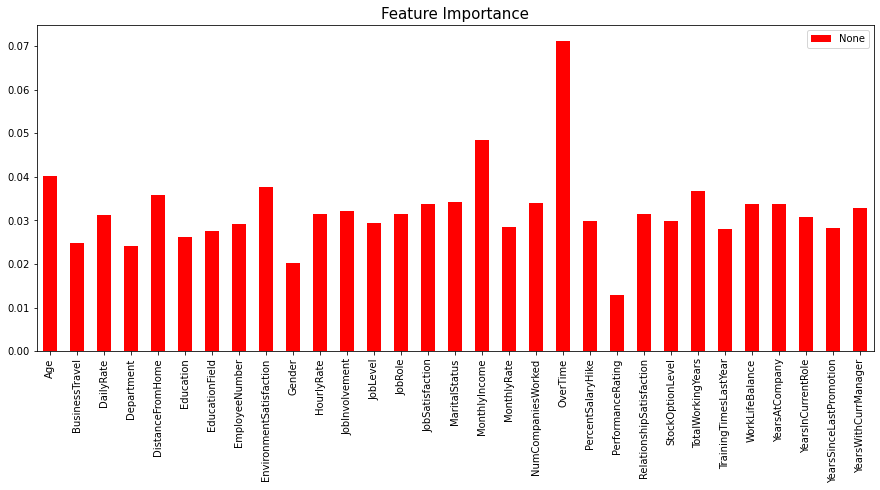

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)
plt.figure(figsize=(15,6))
plt.title('Feature Importance',fontsize=15,)
feature=pd.Series(extra.feature_importances_,index=x.columns)
feature.plot(kind='bar',color='Red',legend='reverse')
plt.show();

# Splitting Data training and testing.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc


In [38]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)
        
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy*100)
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('F1 score',f1_score(y_test,pred)*100)
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('Classification Report',classification_report(y_test,pred))
    print('Roc_auc Score',roc_auc_score(y_test,pred)*100)
    print('\n')
    sns.regplot(pred,y_test)
    return final_r

# LogisticRegression:

max accuracy score corresponding to 42 is 88.12949640287769
cross validation score 87.23813728800354
Standard Deviation 0.7509186318441401
F1 score 50.74626865671642
Training accuracy 88.00721370604148
Test Accuracy 88.12949640287769
Confusion Matrix [[228   7]
 [ 26  17]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.97      0.93       235
           1       0.71      0.40      0.51        43

    accuracy                           0.88       278
   macro avg       0.80      0.68      0.72       278
weighted avg       0.87      0.88      0.87       278

Roc_auc Score 68.27808015833745




42

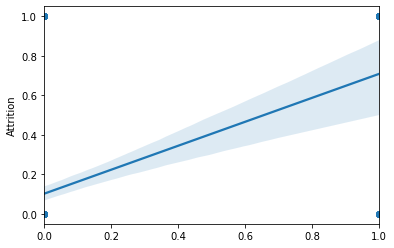

In [39]:
log_r= LogisticRegression()
max_accuracy_score(log_r,x,y)

# Random Forest Classifier:

max accuracy score corresponding to 63 is 88.12949640287769
cross validation score 85.58060410877074
Standard Deviation 0.6001274961031038
F1 score 29.629629629629626
Training accuracy 100.0
Test Accuracy 86.33093525179856
Confusion Matrix [[232   3]
 [ 35   8]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.99      0.92       235
           1       0.73      0.19      0.30        43

    accuracy                           0.86       278
   macro avg       0.80      0.59      0.61       278
weighted avg       0.85      0.86      0.83       278

Roc_auc Score 58.66402770905492




63

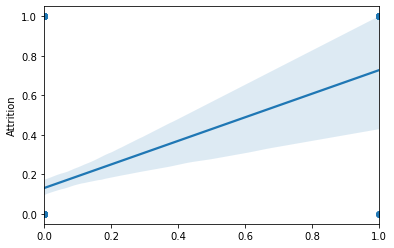

In [40]:
rf =RandomForestClassifier()
max_accuracy_score(rf,x,y)

# KNN:

max accuracy score corresponding to 42 is 84.89208633093526
cross validation score 84.28278315975378
Standard Deviation 0.5345511278802801
F1 score 16.0
Training accuracy 87.01532912533814
Test Accuracy 84.89208633093526
Confusion Matrix [[232   3]
 [ 39   4]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.99      0.92       235
           1       0.57      0.09      0.16        43

    accuracy                           0.85       278
   macro avg       0.71      0.54      0.54       278
weighted avg       0.81      0.85      0.80       278

Roc_auc Score 54.01286491835724




42

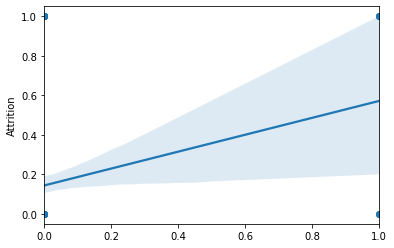

In [41]:
knn = KNeighborsClassifier()
max_accuracy_score(knn,x,y)

# Decision Tree

max accuracy score corresponding to 86 is 82.37410071942446
cross validation score 78.65776692725242
Standard Deviation 1.3683104773625676
F1 score 38.38383838383838
Training accuracy 100.0
Test Accuracy 78.05755395683454
Confusion Matrix [[198  37]
 [ 24  19]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.84      0.87       235
           1       0.34      0.44      0.38        43

    accuracy                           0.78       278
   macro avg       0.62      0.64      0.63       278
weighted avg       0.81      0.78      0.79       278

Roc_auc Score 64.22068283028203




86

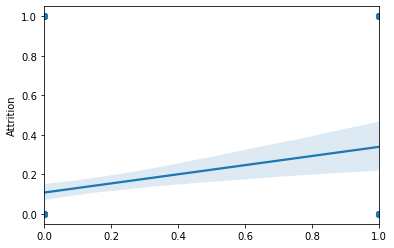

In [42]:
dt = DecisionTreeClassifier()
max_accuracy_score(dt,x,y)

# AdaBoost:

max accuracy score corresponding to 42 is 86.6906474820144
cross validation score 85.00350622029451
Standard Deviation 1.2400668000578063
F1 score 53.16455696202531
Training accuracy 89.72046889089269
Test Accuracy 86.6906474820144
Confusion Matrix [[220  15]
 [ 22  21]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.94      0.92       235
           1       0.58      0.49      0.53        43

    accuracy                           0.87       278
   macro avg       0.75      0.71      0.73       278
weighted avg       0.86      0.87      0.86       278

Roc_auc Score 71.22711528946067




42

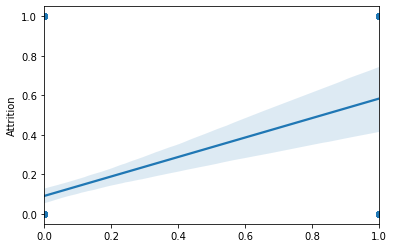

In [43]:
adb= AdaBoostClassifier()
max_accuracy_score(adb,x,y)

# Gradient Boost:

max accuracy score corresponding to 42 is 84.89208633093526
cross validation score 85.79643144690023
Standard Deviation 0.5993112522846635
F1 score 36.36363636363637
Training accuracy 96.48331830477908
Test Accuracy 84.89208633093526
Confusion Matrix [[224  11]
 [ 31  12]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.95      0.91       235
           1       0.52      0.28      0.36        43

    accuracy                           0.85       278
   macro avg       0.70      0.62      0.64       278
weighted avg       0.82      0.85      0.83       278

Roc_auc Score 61.61306284017813




42

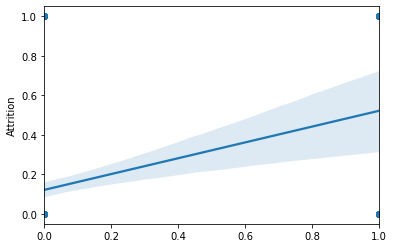

In [44]:
gb = GradientBoostingClassifier()
max_accuracy_score(gb,x,y)

In [45]:
models_scores = pd.DataFrame({'Model':['Logistic Regression','Decision Tree','KNN','Random Forest','AdaBoost','GradientBoost'],
                             'CrossValidation Score':[87.23,79.09,84.28,85.29,85.00,86.15],
                              'Accuracy _Score':[88.12,81.65,84.89,87.76,86.69,84.89],
                             'F1_score':[50.74,39.62,16.00,32.72,53.16,36.36],
                             'Roc_Auc_Score':[68.27,65.48,54.01,59.82,71.22,61.61]})



In [46]:
models_scores

,Model,CrossValidation Score,Accuracy _Score,F1_score,Roc_Auc_Score
0,Logistic Regression,87.23,88.12,50.74,68.27
1,Decision Tree,79.09,81.65,39.62,65.48
2,KNN,84.28,84.89,16.00,54.01
3,Random Forest,85.29,87.76,32.72,59.82
4,AdaBoost,85.00,86.69,53.16,71.22
5,GradientBoost,86.15,84.89,36.36,61.61


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60,test_size=.20,stratify=y)

lg=LogisticRegression()
param={'penalty':['l2','l1'],'C':[.0001,.001,.01,1,10],'solver':['liblinear','saga']}

grid=GridSearchCV(estimator=lg,param_grid=param,scoring='accuracy',n_jobs=-1)

grid.fit(x_train,y_train)

grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [48]:
lg_final=LogisticRegression(C=10,penalty='l2',solver='liblinear')
lg_final.fit(x_train,y_train)
pred=lg_final.predict(x_test)
print('Final Accuracy_score :',accuracy_score(pred,y_test)*100)
print('Final f_1 score :',f1_score(pred,y_test)*100)
print('Final roc_auc score :',roc_auc_score(pred,y_test))
print('Final classification Report :',classification_report(pred,y_test))
print('Final confusion Matrix :',confusion_matrix(pred,y_test))

Final Accuracy_score : 89.568345323741
Final f_1 score : 60.27397260273973
Final roc_auc score : 0.8595986424671684
Final classification Report :               precision    recall  f1-score   support

           0       0.98      0.90      0.94       251
           1       0.48      0.81      0.60        27

    accuracy                           0.90       278
   macro avg       0.73      0.86      0.77       278
weighted avg       0.93      0.90      0.91       278

Final confusion Matrix : [[227  24]
 [  5  22]]


# Saving the model.

In [49]:
import joblib
joblib.dump(lg_final,'Attrition_lg.pkl')

['Attrition_lg.pkl']

In [50]:
loaded_model=joblib.load('Attrition_lg.pkl')
prediction=loaded_model.predict(x_test)

In [51]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])